## Solving a system of differential equations
Differential equations are methods to model the differences/differentials/changes of system. If you want to know the actual value, X(t), start with the (initial) value at time = 0, and then add up all the changes through times, t, where the changes are described by the differential equation. To represent this an equation requires an integration step, for example: 
$$ 
\begin{align} 
\frac{dx}{dt} &= t + 2 \\
dx &= (t + 2) dt \\
\int dx &= \int (t+2)dt\\
x(t) &= \frac{t^2}{2} + 2x + c \\
\end{align}
$$

To reconcile the actual value through time, x(t), x as function of time, simply plug in  a vector of time steps.

### The *step* function
Understanding how a system responds to inputs, u, is an essential part of dynamical/control systems. A common dynamical systems analysis is the response of a system to a sudden input (a step change/Heaviside function). The analysis passes a constant, unit input into the system and then analysers the step response measured, y(t). Below is an example of the a response graph:

![](images/step_response.png)

The Python SciPy package contains methods to seamlessly create step response graphs in a two step process: 
1. Create a linear time invariant system i.e. in state space reresentation
2. Call *step()* function on lti system
By calling the step function, SciPy implicitly,
1. Calculates a time vector, T of calculated length, *if not defined*.
2. Creates a vector of units input, U
3. Sets initial value to zero, *if not defined*. 
4. Passes lti system, initial value, time vector and inputs to lsim function which simulates the output of a continuous-time linear system. This simulation is achieved by integrating (starting with initial value and adding small changes at each time step) t



When simulating a step (unit) response of a system (linear time invariant)

## Capturing machine learning methods applicable to control
Recent years have seen the explosion of machine learning methods arising from high degree of prediction accuaracy. This increase in prediction accuracy spans both linear and non-linear functions. One field of study that significantly benefits from improved non-linear prediction capacity is the field of control theory is *control theory*.

Applications to control theory
1. Non-linear gain function, K
2. Learning dynamics from data instead of defined physics equations


This notebook is catch all bucket for machine learning approaches that are useful in control and their respective implementation in Python. Notebook is to capture an introductory level of detail; once sufficient detail captured or direct application a stand alone notebook with be created.

#### Feedforward neural networks

In [17]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
# define a simple feedforward network in Python
# -> torch.nn.Linear: yields fully connected layer, can connect to activation units OR directly output results 
# -> torch.nn.ReLU: yields activation units, connects to 'torch.nn.Linear' or equivalent
class Feedforward(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            # output = self.sigmoid(output)
            return output
        
# setup feedforward network with 1 layer of 20 hidden units 
net = Feedforward(1,20)
print(net)

Feedforward(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)


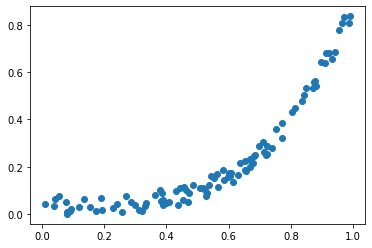

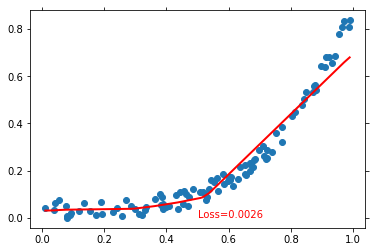

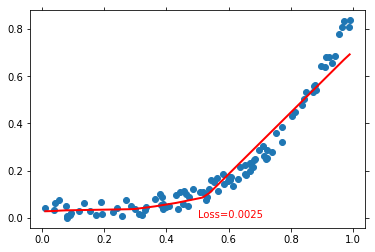

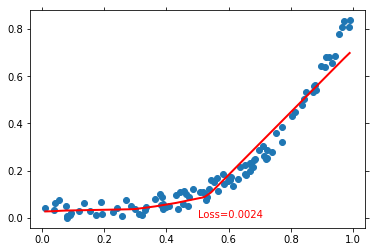

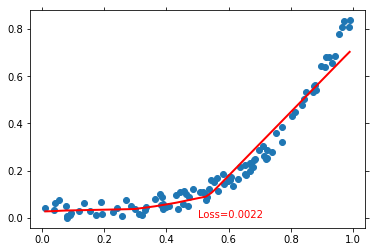

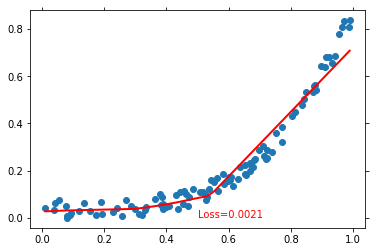

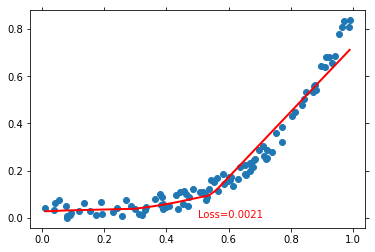

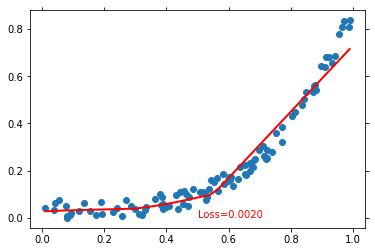

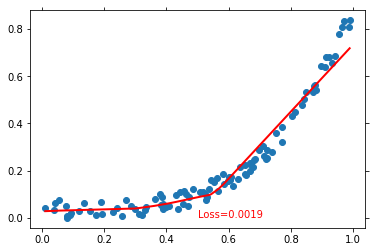

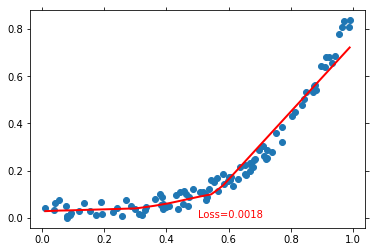

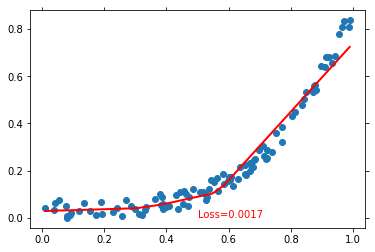

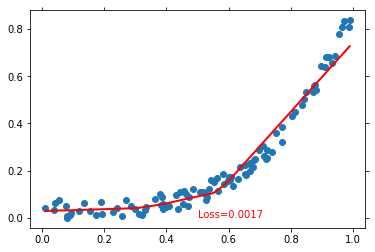

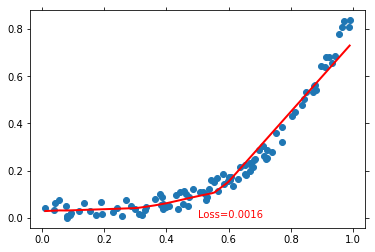

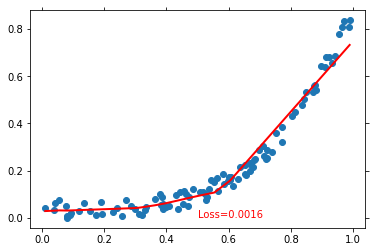

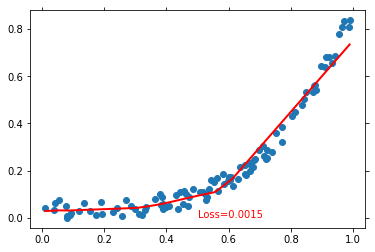

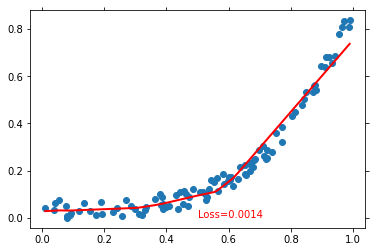

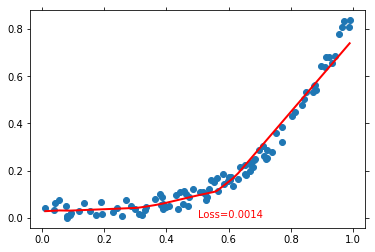

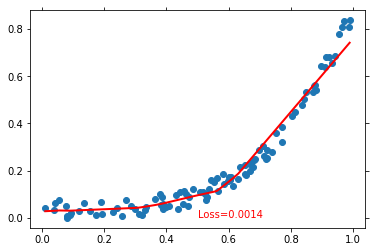

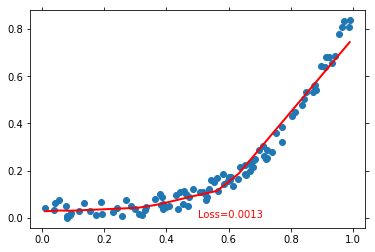

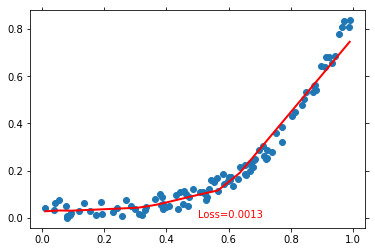

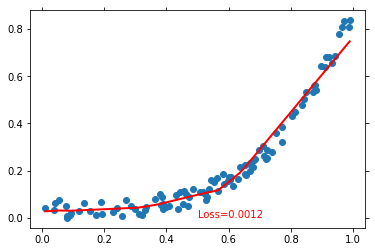

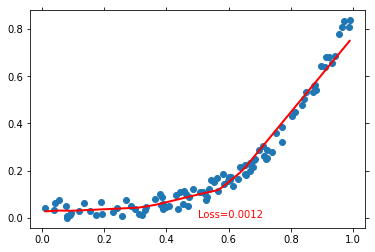

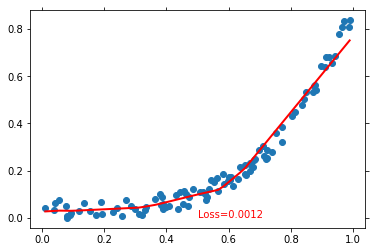

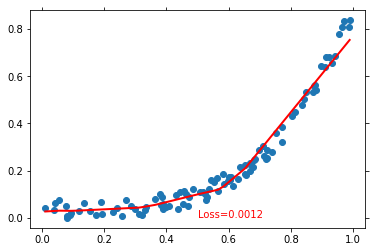

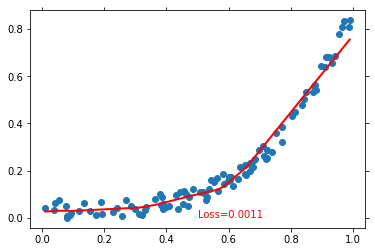

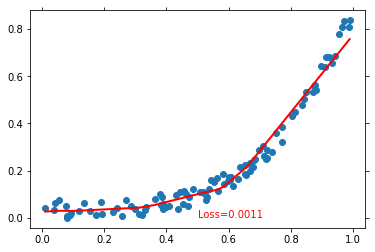

In [34]:
# create a data set and convert to torch tensors
x = np.random.rand(100)
y = np.sin(x) * np.power(x,3)  + np.random.rand(100)*0.08

plt.scatter(x, y)
plt.show()
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()


# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

# train neural network
inputs = Variable(x)
outputs = Variable(y)
for i in range(250):
    prediction = net(inputs)
    loss = loss_func(prediction, outputs) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       

    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        pd_temp = pd.DataFrame({"x":x.data.numpy().tolist(), "y":prediction.data.numpy().tolist()})
        pd_temp.sort_values(by="x", inplace = True)
        plt.plot(pd_temp['x'].tolist(), pd_temp['y'].tolist(), 'r-', lw=2)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)


plt.show()